In [1]:
%%capture
## compile PyRossTSI for this notebook
import os
owd = os.getcwd()
os.chdir('../..')
%run setup.py install
os.chdir(owd)

import pyrosstsi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 15                                       # Longest  infectious duration
Td = 5                                       # Doubling time in linear growth regime
Tf = 150                                     # Duration of simulation

tsi  = np.array([0,   3,    5,   10,   T])   # Time since infection (days)
beta = np.array([0,   0.5,  1,   .5,   0])   # Mean infectiousness 
tsi_sc=np.array([0,3.,6., 9.,   12,    T]) 

M = 2                                        # Number of age groups to model
Ni = 10**6*np.ones(M)                        # Number of people in each age group
Np = sum(Ni)                                 # Total population size

subclasses = ['Recovered', 'Hospitalized', 'Mortality']  
Nc = len(subclasses)
Nk = 10                #Number of stages in Predictor/Corrector method
Tc = T/2               

def contactMatrix(t):    return np.array([[4, 1],[1, 2]]); 

In [3]:
parameters = {'M':M, 'Ni':Ni, 'Nc':Nc, 'Nk':Nk, 
              'Tf':Tf, 'Tc':Tc, 'T':T, 'Td':Td,
              'tsi':tsi,'beta':beta,'tsi_sc':tsi_sc,
              'contactMatrix':contactMatrix}

In [4]:
model = pyrosstsi.deterministic.Simulator(parameters, subclasses)


In [5]:
IC = model.get_IC()
model.nondimensionalize()
data   = model.integrate(IC)


[ 0.         -0.64075448] [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]] [[985.47150135 408.19566119]
 [620.80814431 257.147153  ]
 [391.08462448 161.9925555 ]
 [246.36787534 102.0489153 ]
 [155.20203608  64.28678825]
 [ 97.77115612  40.49813887]
 [ 61.59196883  25.51222882]
 [ 38.80050902  16.07169706]
 [ 24.44278903  10.12453472]
 [ 15.39799221   6.37805721]]


(0.0, 65.37316288333822)

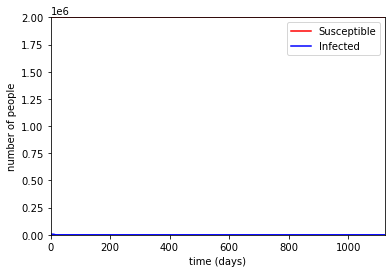

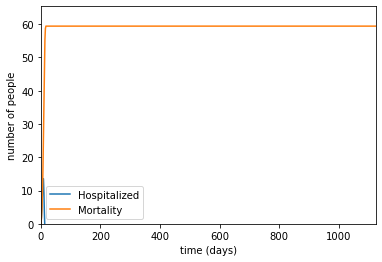

In [6]:
t = data['t']
S_t = data['S_t']
I_t = data['I_t']
Ic_t = data['Ic_t']


plt.figure()    
plt.plot(t*Tc,Np*np.sum(S_t,0),'r', label = 'Susceptible')           #all susceptible
plt.plot(t*Tc,Np*np.sum(I_t,0),'b', label = 'Infected')              #all Infected
plt.legend()
plt.xlabel('time (days)');       plt.xlim(0,Tf*Tc)
plt.ylabel('number of people');  plt.ylim(0,Np)

#Other subclasses of Infected:
plt.figure() 
for i in (1 + np.arange(Nc-1)):
    plt.plot(Tc*t,Np*np.sum(Ic_t[i,:,:],0), label = subclasses[i])
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('number of people')
plt.xlabel('time (days)');       plt.xlim(0,Tf*Tc)
plt.ylabel('number of people');  plt.ylim(0,1.1*np.amax(Np*np.sum(Ic_t[2,:,:],0)))

In [7]:
IC

[array([0.5, 0.5]),
 array([[3.69551813e-03, 1.53073373e-03],
        [2.32803054e-03, 9.64301824e-04],
        [1.46656734e-03, 6.07472083e-04],
        [9.23879533e-04, 3.82683432e-04],
        [5.82007635e-04, 2.41075456e-04],
        [3.66641835e-04, 1.51868021e-04],
        [2.30969883e-04, 9.56708581e-05],
        [1.45501909e-04, 6.02688640e-05],
        [9.16604589e-05, 3.79670052e-05],
        [5.77424708e-05, 2.39177145e-05]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.]])]

In [8]:
ep = 10**-3/T*Np


In [9]:
ep

133.33333333333334